In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


We see that there are missing values about the Job Satisfaction (for example South Sudan). We want to delete those values.

In [4]:
data.dropna(inplace = True)
data.set_index('Country', inplace = True)
data.drop(['Happiness Rank'], axis = 1, inplace = True)

In [5]:
data.mean()

Happiness Score      5.357874
Economy              0.983895
Family               1.190509
Health               0.550794
Freedom              0.409805
Generosity           0.244914
Corruption           0.123008
Dystopia             1.854910
Job Satisfaction    75.209934
dtype: float64

In [6]:
data.max(numeric_only = float)

Happiness Score      7.537000
Economy              1.870766
Family               1.610574
Health               0.949492
Freedom              0.658249
Generosity           0.838075
Corruption           0.464308
Dystopia             3.117485
Job Satisfaction    95.100000
dtype: float64

In [7]:
data.min(numeric_only = float)

Happiness Score      2.693000
Economy              0.000000
Family               0.000000
Health               0.000000
Freedom              0.000000
Generosity           0.000000
Corruption           0.000000
Dystopia             0.377914
Job Satisfaction    44.400000
dtype: float64

The list of the 10 happiest countries :

In [8]:
data.head(10)

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,
Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


The list of the 10 least happy counties :

In [9]:
data.tail(10)

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,
Haiti,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
Yemen,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
Liberia,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Guinea,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Togo,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa


In [10]:
regions = ['North America', 'Latin America', 'Western Europe', 'Eastern Europe', 'Asia-Pacific', 'Africa']
happiness = []
happycountries = []
jealousy = []
for i in range(0,6) :
    subdata = data.loc[data['Region']== regions[i]]['Happiness Score']
    happiness.append(subdata.mean())
    filter = subdata > 6
    happycountries.append(sum(x for x in filter))
    jealousy.append(subdata.max()- subdata.min())

In [11]:
continent = pd.DataFrame({'Region': regions, 'Mean Happiness': happiness,
                          'Number of happy countries': happycountries, 'Happiness disparity' : jealousy})
continent.set_index('Region', inplace = True)
continent = continent.sort_values('Mean Happiness', ascending = False)
continent = continent[['Mean Happiness','Number of happy countries', 'Happiness disparity']]
continent

,Mean Happiness,Number of happy countries,Happiness disparity
Region,,,
North America,7.154500,2,0.323
Western Europe,6.880474,17,2.342
Latin America,5.957818,13,3.476
Eastern Europe,5.498952,1,1.454
Asia-Pacific,5.358326,11,3.852
Africa,4.254581,0,3.179


We see that Asia-Pacific has the greatest range of happiness scores.

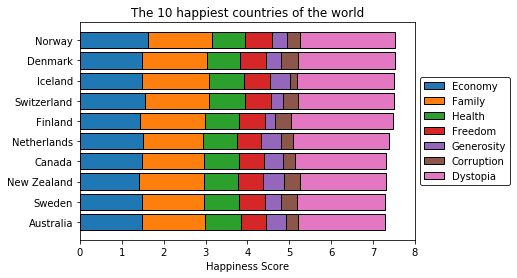

In [12]:
criteria = ['Economy','Family','Health','Freedom','Generosity','Corruption', 'Dystopia', 'Job Satisfaction']
lefts = 0
plt.barh(np.arange(10), data.iloc[0:10][criteria[0]], edgecolor = 'black', label = criteria[0])
for i in range(0,6):
    lefts += data.iloc[0:10][criteria[i]]
    plt.barh(np.arange(10), data.iloc[0:10][criteria[i+1]], left = lefts, edgecolor = 'black', label = criteria[i+1])
plt.xticks(range(0,9))
plt.yticks(np.arange(10), data.index)
plt.gca().invert_yaxis()
plt.xlabel('Happiness Score')
plt.title('The 10 happiest countries of the world')
plt.legend(loc = 'center left',bbox_to_anchor = (1,0.5),edgecolor = 'black')
plt.show()

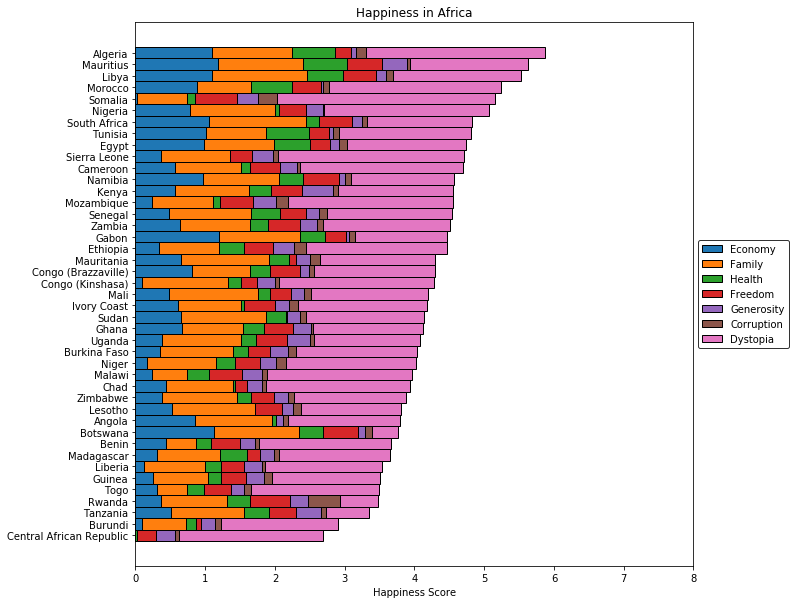

In [13]:
data_africa = data.loc[data['Region']== 'Africa']
numaf = data_africa['Happiness Score'].count() 
lefts = 0
plt.figure(figsize =(10,10))
plt.barh(np.arange(numaf), data_africa[criteria[0]], edgecolor = 'black', label = criteria[0], height = 1)
for i in range(0,6):
    lefts += data_africa[criteria[i]]
    plt.barh(np.arange(numaf), data_africa[criteria[i+1]], left = lefts, edgecolor = 'black', 
             label = criteria[i+1], height = 1)
plt.xticks(range(0,9))
plt.yticks(np.arange(numaf), data_africa.index)
plt.gca().invert_yaxis()
plt.xlabel('Happiness Score')
plt.title('Happiness in Africa')
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5), edgecolor = 'black')
plt.show()

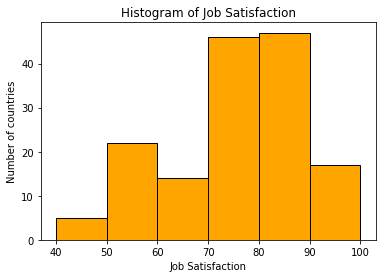

In [14]:
plt.hist(data['Job Satisfaction'], bins = [40,50,60,70,80,90,100], color='orange', edgecolor = 'black')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of countries')
plt.title('Histogram of Job Satisfaction')
plt.show()

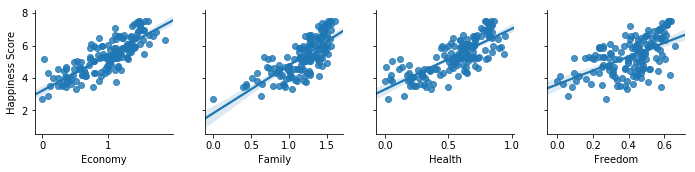

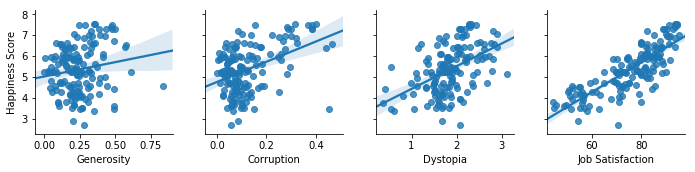

In [15]:
sns.pairplot(data, y_vars = ['Happiness Score'], x_vars = criteria[:4], kind = 'reg')
sns.pairplot(data, y_vars = ['Happiness Score'], x_vars = criteria[4:], kind = 'reg')

We see that there is a big correlation between the Happiness Score and the Economy and Job Satisfaction respectively. However, corruption or generosity doesn't seem to influence the Happiness Score a lot.

In [16]:
filter = data['Happiness Score'] > 6
data[filter]['Happiness Score'].count()

44

We recall that the number of 'happy countries' in Western Europe is 17 (see the previous data frame). Therefore, the probability that a 'happy country' lies in Western Europe will be $\frac{17}{44}$.

In [17]:
countries = data.loc[:,'Region'].values
matrix = []
matrix_ij = 0
for i in range(0,countries.size):
    for j in range(0,6): 
        if countries[i] == regions[j]:
            matrix_ij = 1
        else:
            matrix_ij = 0
        matrix.append(matrix_ij)
np.array(matrix).reshape(countries.size,6)


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
 